In [1]:
import numpy as np
import spacy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sys
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
f = open('../DATA1.txt', encoding = "ISO-8859-1")
x = f.readlines()
f.close()

In [15]:
emotion = []
sentences = []

currIdx = 0
for line in x:
    slashIdx = line.find('\t')
    if slashIdx != -1:
        emotion.append(line[0:slashIdx])
        sentences.append(line[slashIdx+2:len(line)-2])
        
    else:
        sentences[currIdx] += ' ' + line[0:len(line)-2]
        if line.find('"') != -1:
            currIdx += 1

In [16]:
nlp = spacy.load("en")

means = []
maxs = []
mins = []
f1 = open("word_vec.txt", "w+")
for i in range(len(sentences)):
    sentences_tokens = nlp(sentences[i])
    sentences_vectors = np.vstack([word.vector for word in sentences_tokens if (word.has_vector and str(word) not in stop_words)])
    means.append(np.mean(sentences_vectors, axis=0))
    maxs.append(np.max(sentences_vectors, axis=0))
    mins.append(np.min(sentences_vectors, axis=0))

    f1.write('[')
    for j in range(len(means[i])):
        f1.write(str(means[i][j]) + ', ')
    f1.write(emotion[i] + '],\n')
f1.close()

In [17]:
pca = PCA(n_components=2)
sentences_vecs_transformed = pca.fit_transform(maxs)
sentences_vecs_transformed1 = np.c_[emotion, sentences_vecs_transformed]

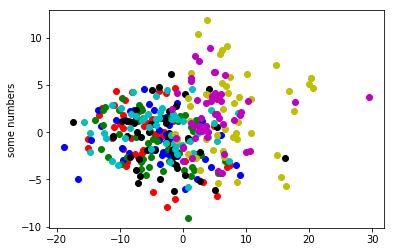

In [18]:
# anger 0
# disgust 1096
# fear 2192
# guilt 3287
# joy 4380
# sadness 5474
# shame 6570
plt.plot(sentences_vecs_transformed[0:50,0], sentences_vecs_transformed[0:50,1], 'ro') # anger
plt.plot(sentences_vecs_transformed[1500:1550,0], sentences_vecs_transformed[1500:1550,1], 'bo') # disgust
plt.plot(sentences_vecs_transformed[3000:3050,0], sentences_vecs_transformed[3000:3050,1], 'go') # fear
plt.plot(sentences_vecs_transformed[3500:3550,0], sentences_vecs_transformed[3500:3550,1], 'ko') # guilt
plt.plot(sentences_vecs_transformed[4000:4050,0], sentences_vecs_transformed[4000:4050,1], 'co') # joy
plt.plot(sentences_vecs_transformed[6000:6050,0], sentences_vecs_transformed[6000:6050,1], 'yo') # sadness
plt.plot(sentences_vecs_transformed[7000:7050,0], sentences_vecs_transformed[7000:7050,1], 'mo') # shame
plt.show()